# Importing Libraries

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
sns.set_palette('muted')


C:\Users\ragha\AppData\Local\Temp\ipykernel_10796\2903024142.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Reading the data


In [14]:
sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})


# Plotting the count of ham and spam messages


c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


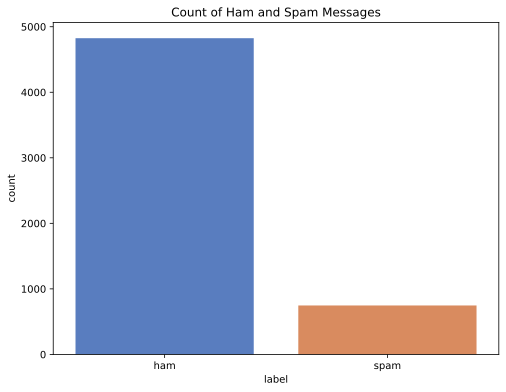

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sms, x='label')
plt.title("Count of Ham and Spam Messages")
plt.show()

# Plotting the distribution of message lengths


c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


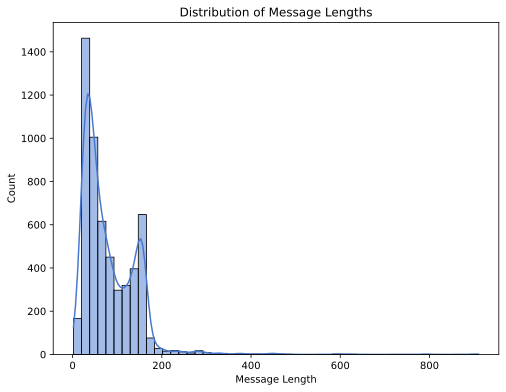

In [16]:
sms['message_len'] = sms['message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=sms, x='message_len', bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.show()

# Bar Chart for Message Length by Label


c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


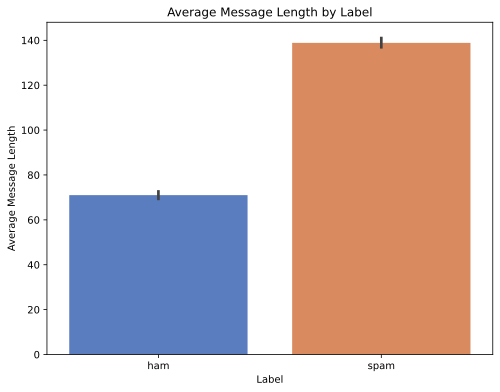

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='message_len', data=sms)
plt.title("Average Message Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Message Length")
plt.show()

# Box Plots for Message Length by Label


c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ragha\miniconda3\envs\cod\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


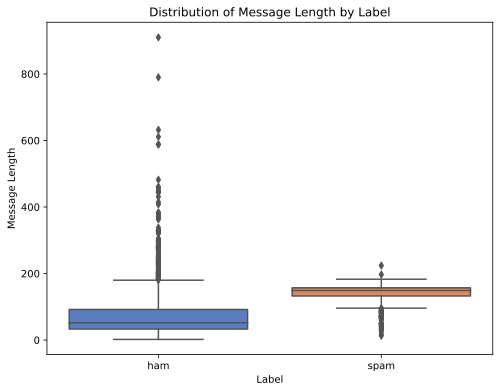

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='message_len', data=sms)
plt.title("Distribution of Message Length by Label")
plt.xlabel("Label")
plt.ylabel("Message Length")
plt.show()


# Spliting the data


In [19]:

X = sms['message']
y = sms['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Vectorizing text using TF-IDF


In [20]:

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, ngram_range=(1, 2))
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)


# Training Multinomial Naive Bayes model


In [21]:

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)


MultinomialNB()

# Making predictions


In [22]:

y_pred_class = nb.predict(X_test_dtm)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]


# Evaluating model


In [23]:

accuracy = accuracy_score(y_test, y_pred_class)
confusion = confusion_matrix(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)


# Getting scores

In [24]:

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9770279971284996
ROC AUC Score: 0.98928735000458
Confusion Matrix:
[[1213    0]
 [  32  148]]
